In [129]:
from sympy import *
from pylab import *
import sympy as sp
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import odeint
sin = np.sin

# 1. Ecuación logística

#### Se definen las variables

In [2]:
t = sp.symbols('t')
p = sp.Function('p')
a = sp.symbols('a')
b = sp.symbols('b')
p0 = sp.symbols('p0')

#### Se define la ecuación

In [3]:
ode = sp.Eq( sp.Derivative(p(t), t) -a*p(t) +b*p(t)*p(t), 0 )
ode

Eq(-a*p(t) + b*p(t)**2 + Derivative(p(t), t), 0)

#### Se resuelve la ecuación

In [4]:
sol = sp.dsolve( ode, p(t), ics={p(0):p0} )
sol

Eq(p(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

#### Se dan valores a \$a,\ b\ \text{y}\ p_0$ y se evaluan las respectivas soluciones

In [5]:
constants = {a:0.03, b:0.0001, p0:5}
sol1 = sol.subs(constants)
sol1

Eq(p(t), -5.08474576271187*exp(0.03*t)/(-0.0169491525423729*exp(0.03*t) - 1))

In [6]:
constants = {a:0.03, b:0.0001, p0:6}
sol2 = sol.subs(constants)
sol2

Eq(p(t), -6.12244897959184*exp(0.03*t)/(-0.0204081632653061*exp(0.03*t) - 1))

In [7]:
constants = {a:0.03, b:0.0001, p0:7}
sol3 = sol.subs(constants)
sol3

Eq(p(t), -7.16723549488055*exp(0.03*t)/(-0.0238907849829352*exp(0.03*t) - 1))

#### Se grafican las soluciones

In [8]:
#La función lambdify permite definir una función a partir de la expresión simbólica
#rhs se refiere a right hand side, es decir, la expresión que se asigna en una variable
#LHS | ES | RHS
#variable_name | = | expresión
func1 = sp.lambdify(t, sol1.rhs, 'numpy')
func2 = sp.lambdify(t, sol2.rhs, 'numpy')
func3 = sp.lambdify(t, sol3.rhs, 'numpy')

In [9]:
#Partición
tt = np.arange(0, 200, 1)
#Evaluar las funciones
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)

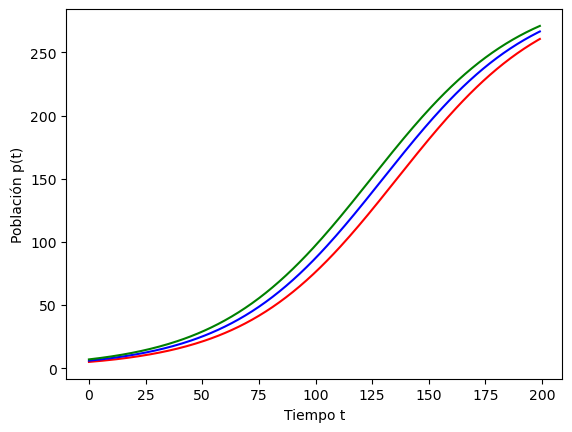

In [10]:
#Graficar
#'r', 'b' y 'g' son los colores
plt.plot(tt, pp1, 'r', tt, pp2, 'b', tt, pp3, 'g')
plt.xlabel('Tiempo t')
plt.ylabel('Población p(t)')
plt.show()

#### Se clasifica y se verifica la solución

In [11]:
classify_ode(ode)

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [12]:
sol = dsolve(ode, p(t))
sol

Eq(p(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))

In [13]:
checkodesol(ode, sol)

(True, 0)

#### Se muestra que el denominador por sí solo no es solución

In [14]:
C1 = sp.symbols('C1')
sol1 = b*( exp( a*(C1+t) ) -1 )
sol1

b*(exp(a*(C1 + t)) - 1)

In [15]:
checkodesol(ode, sol1)

(False, b*(a + b**2*(1 - exp(a*(C1 + t)))**2))

---

# 2. Ecuación de Lagrange

#### Se definen las variables

In [16]:
x = sp.symbols('x')
y = sp.Function('y')

#### Se define la ecuación

In [17]:
ode2 = sp.Eq( log( sp.Derivative(y(x), x) ) +2*x*sp.Derivative(y(x),x) -y(x), 0 )
ode2

Eq(2*x*Derivative(y(x), x) - y(x) + log(Derivative(y(x), x)), 0)

#### Se resuelve la ecuación

In [18]:
sol2 = sp.dsolve(ode2, y(x))
sol2

Eq(C1 - y(x) - log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))), 0)

---

# 3. Ecuación de Resonancia

#### Se definen las variables

In [19]:
t = sp.symbols('t')
y = sp.Function('y')

#### Se define la ecuación

In [20]:
#sp.Derivative(y(t),t,t) Indica la segunda derivada respecto a t
ode3 = sp.Eq( sp.Derivative(y(t),t,t) +16*y(t) -8*sin(4*t), 0 )
ode3

Eq(16*y(t) - 8*sin(4*t) + Derivative(y(t), (t, 2)), 0)

#### Se resuelve la ecuación diferencial

In [21]:
sol3 = sp.dsolve(ode3, y(t))
sol3

Eq(y(t), C2*sin(4*t) + (C1 - t)*cos(4*t))

#### Definimos las condiciones iniciales y sustituimos

In [22]:
C1, C2 = sp.symbols('C1,C2')
const = sp.solve([ sol3.rhs.subs(t, 0)-1, sol3.rhs.diff(t, 1).subs(t, 0)-0 ])
const

{C1: 1, C2: 1/4}

In [23]:
sol3 = sol3.subs(const)
sol3

Eq(y(t), (1 - t)*cos(4*t) + sin(4*t)/4)

#### Definimos una función a partir de la solución simbólica

In [24]:
func1 = sp.lambdify(t, sol3.rhs, 'numpy')
xx = np.arange(0, 10, 0.1)
yy1 = func1(xx)

#### Graficamos

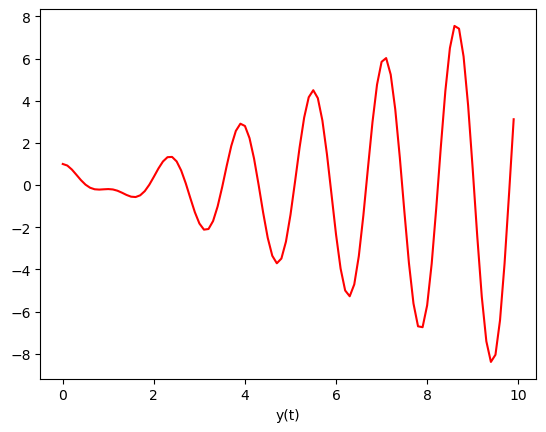

In [25]:
plt.plot(xx, yy1, 'r')
plt.xlabel('Tiempo t')
plt.xlabel('y(t)')
plt.show()

---

# 4. Ecuación de tercer orden

#### Definimos las variables

In [26]:
t = sp.symbols('t')
y = sp.Function('y')
g = sp.Function('g')

#### Definimos la ecuación

In [27]:
#sp.Derivative(y(t), t, 3) es la función, la variable respecto a la cual derivar y el grado de derivación
ode4 = sp.Eq( sp.Derivative(y(t), t, 3) -sp.Derivative(y(t), t, t) -sp.Derivative(y(t), t) +y(t) -g(t), 0 )
ode4

Eq(-g(t) + y(t) - Derivative(y(t), t) - Derivative(y(t), (t, 2)) + Derivative(y(t), (t, 3)), 0)

#### Resolvemos la ecuación

In [28]:
sol4 = sp.dsolve(ode4, y(t))
sol4

Eq(y(t), (C1 + Integral(g(t)*exp(t), t)/4)*exp(-t) + (C2 + t*(C3 + Integral(g(t)*exp(-t), t)/2) - Integral((2*t + 1)*g(t)*exp(-t), t)/4)*exp(t))

---

# 5. Una ecuación homogénea de Cauchy-Euler de cuarto orden

#### Se definen las variables

In [29]:
x = sp.symbols('x')
y = sp.Function('y')

#### Se define la ecuación

In [31]:
ode5 = sp.Eq( x**4*sp.Derivative(y(x), x, 4) +6*x*x*x*sp.Derivative(y(x), x, 3) +9*x**2*sp.Derivative(y(x), x, 2) +3*x*sp.Derivative(y(x),x) +y(x), 0 )
ode5

Eq(x**4*Derivative(y(x), (x, 4)) + 6*x**3*Derivative(y(x), (x, 3)) + 9*x**2*Derivative(y(x), (x, 2)) + 3*x*Derivative(y(x), x) + y(x), 0)

#### Se resuelve la ecuación

In [34]:
sol5 = sp.dsolve(ode5, y(x))
sol5

Eq(y(x), C3*sin(log(x)) + C4*cos(log(x)) + (C1*sin(log(x)) + C2*cos(log(x)))*log(x))

#### Se hace la sustitución \$y=x^{n}$

In [36]:
n = sp.symbols('n')
#ode5.subs() sustituye y por x^n
eq = simplify(ode5.subs(y(x), x**n))
eq

Eq(9*n*x**n*(n - 1) + 6*n*x**n*(n**2 - 3*n + 2) + n*x**n*(n**3 - 6*n**2 + 11*n - 6) + 3*n*x**n + x**n, 0)

#### Función auxiliar

In [38]:
#factor() factoriza un polinomio a factores irreducibles
factor(eq)

Eq(x**n*(n**2 + 1)**2, 0)

---

# 6. Un problema de valor inicial con deltas de Dirac como fuentes

#### Se definen las variables

In [39]:
t = sp.symbols('t')
y = sp.Function('y')

#### Se define la ecuación

In [42]:
ode6 = sp.Eq( sp.Derivative(y(t), t, 2) -4*sp.Derivative(y(t), t) +4*y(t), 3*DiracDelta(t-1) +DiracDelta(t-2) )
ode6

Eq(4*y(t) - 4*Derivative(y(t), t) + Derivative(y(t), (t, 2)), DiracDelta(t - 2) + 3*DiracDelta(t - 1))

#### Se resuelve la ecuación

In [43]:
sol6 = sp.dsolve(ode6)
sol6

Eq(y(t), (C1 + t*(C2 + exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1)) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1))*exp(2*t))

#### Se resuelve la ecuación con constantes

In [44]:
constants = solve( [sol6.rhs.subs(t,0) -1, sol6.rhs.diff(t, 1).subs(t, 0) -1] )
sol6.subs(constants)

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

---

# 7. Sistema masa-resorte

#### Se definen las variables

In [46]:
t = sp.symbols('t')
y = sp.Function('y')
m = sp.symbols('m')
k = sp.symbols('k')
a = sp.symbols('a')

#### Se define la ecuación

In [48]:
ode7 = sp.Eq( m*sp.Derivative(y(t), t, t) +k*exp(-a*t)*y(t), 0 )
ode7

Eq(k*y(t)*exp(-a*t) + m*Derivative(y(t), (t, 2)), 0)

#### Se resuelve la ecuación

In [50]:
sol7 = sp.dsolve(ode7, y(t))
sol7

Eq(y(t), C2*(k**2*t**4*exp(-2*a*t)/(24*m**2) - k*t**2*exp(-a*t)/(2*m) + 1) + C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

---

# 8. Problema de valor inicial para un sistema de ecuaciones lineales

#### Se definen las variables

In [53]:
t = sp.symbols('t')
#cls da la clase de símbolo que es para hacerla función
x, y = sp.symbols( 'x y', cls = Function )

#### Se definen las ecuaciones

In [60]:
#Arreglo de funciones
eqs = [Eq( x(t).diff(t), 3*x(t) -18*y(t) ), Eq( y(t).diff(t), 2*x(t) +9*y(t) )]
eqs[0] 

Eq(Derivative(x(t), t), 3*x(t) - 18*y(t))

In [59]:
eqs[1]

Eq(Derivative(y(t), t), 2*x(t) + 9*y(t))

#### Se resuelve el sistema

In [62]:
sol8 = dsolve(eqs, [x(t), y(t)])
sol8[0]

Eq(x(t), -(3*C1/2 + 3*sqrt(3)*C2/2)*exp(6*t)*cos(3*sqrt(3)*t) - (3*sqrt(3)*C1/2 - 3*C2/2)*exp(6*t)*sin(3*sqrt(3)*t))

In [63]:
sol8[1]

Eq(y(t), C1*exp(6*t)*cos(3*sqrt(3)*t) - C2*exp(6*t)*sin(3*sqrt(3)*t))

#### Se aplican las condiciones iniciales

In [65]:
C1, C2 = sp.symbols('C1, C2')

In [70]:
constants = solve( (sol8[0].subs(t, 0).subs(x(0), 0), sol8[1].subs(t, 0).subs(y(0), 1)), {C1, C2} )
constants

{C1: 1, C2: -sqrt(3)/3}

In [74]:
#expand() pone la función como suma de monomios
xsoln = expand( sol8[0].rhs.subs(constants) )
ysoln = expand( sol8[1].rhs.subs(constants) )
xsoln

-2*sqrt(3)*exp(6*t)*sin(3*sqrt(3)*t)

In [75]:
ysoln

sqrt(3)*exp(6*t)*sin(3*sqrt(3)*t)/3 + exp(6*t)*cos(3*sqrt(3)*t)

#### Se grafica

In [78]:
tt = np.arange(0, 4, 0.01)
funcxt = sp.lambdify(t, xsoln, 'numpy')
funcyt = sp.lambdify(t, ysoln, 'numpy')

In [79]:
xt = funcxt(tt)
yt = funcyt(tt)

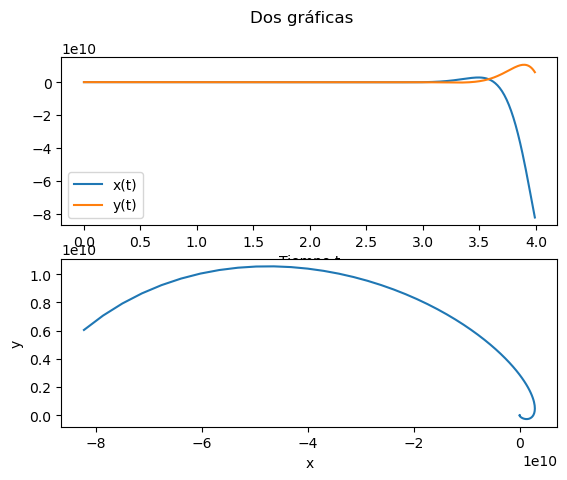

In [91]:
#Crear dos sub gráficas, ax1 y ax2
fig, (ax1, ax2) = plt.subplots(2)
#Título de la gráfica
fig.suptitle('Dos gráficas')
#Gráficas evaluadas en el ax1
ax1.plot(tt, xt, tt, yt)
ax1.set(xlabel='Tiempo t')
ax1.legend(['x(t)', 'y(t)'])
#Gráficas evaluadas en el ax2
ax2.plot(xt, yt)
ax2.set(xlabel='x', ylabel='y')
plt.show()

---

# 9. Ecuación de Airy

#### Se definen las variables

In [92]:
t = sp.symbols('t')
y = sp.Function('y')

#### Se define la ecuación

In [93]:
ode9 = sp.Eq( sp.Derivative(y(t), t, t) -t*y(t), 0 )
ode9

Eq(-t*y(t) + Derivative(y(t), (t, 2)), 0)

#### Se resuelve la ecuación

In [94]:
sol9 = dsolve(ode9, y(t))
sol9

Eq(y(t), C1*airyai(t) + C2*airybi(t))

#### Se encuentra una solución en series de potencias centrada en cero

In [96]:
#hint es el tipo de ecuación con el que se quiere resolver
sols9 = sp.dsolve(ode9, hint = '2nd_power_series_ordinary')
sols9

Eq(y(t), C2*(t**3/6 + 1) + C1*t*(t**3/12 + 1) + O(t**6))

In [97]:
constants = solve([sols9.rhs.subs(t, 0) -1, sols9.rhs.diff(t, 1).subs(t, 0) -1])
constants

{C1: 1, C2: 1}

In [98]:
ysol = expand(sols9.rhs.subs(constants))
ysol

1 + t + t**3/6 + t**4/12 + O(t**6)

#### Se encuentra una solución en series de potencias centrada en \$t=1$

In [100]:
#Serie de potencias, variable y el centro
s9 = simplify( series(sol9.rhs, t, 1) )
s9

(t - 1)*(C1*airyaiprime(1) + C2*airybiprime(1)) + (t - 1)**2*(C1*airyai(1) + C2*airybi(1))/2 + (t - 1)**3*(C1*airyaiprime(1) + C1*airyai(1) + C2*airybiprime(1) + C2*airybi(1))/6 + (t - 1)**4*(2*C1*airyaiprime(1) + C1*airyai(1) + C2*airybi(1) + 2*C2*airybiprime(1))/24 + (t - 1)**5*(C1*airyaiprime(1) + 4*C1*airyai(1) + C2*airybiprime(1) + 4*C2*airybi(1))/120 + C2*airybi(1) + C1*airyai(1) + O((t - 1)**6, (t, 1))

In [104]:
constants = solve([s9.subs(t, 1) -1, s9.diff(t, 1).subs(t, 1) -1])
constants

{C1: (-airybi(1) + airybiprime(1))/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)),
 C2: (airyai(1) - airyaiprime(1))/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1))}

In [106]:
ss9 = s9.subs(constants)
simplify( series(ss9, t, 1, 6) )
ss9

(airyai(1) - airyaiprime(1))*airybi(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (-airybi(1) + airybiprime(1))*airyai(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (t - 1)*((-airybi(1) + airybiprime(1))*airyaiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1))) + (t - 1)**2*((-airybi(1) + airybiprime(1))*airyai(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybi(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)))/2 + (t - 1)**3*((-airybi(1) + airybiprime(1))*airyai(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (-airybi(1) + airybiprime(1))*airyaiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybi(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*a

---

# 10. Campo de direcciones de una ecuación diferencial

#### Se definen las variables

In [107]:
#lista de matrices de coordenadas de vectores
x, y = np.meshgrid( np.linspace(-2, 3, 15), np.linspace(.2, 3, 15) )

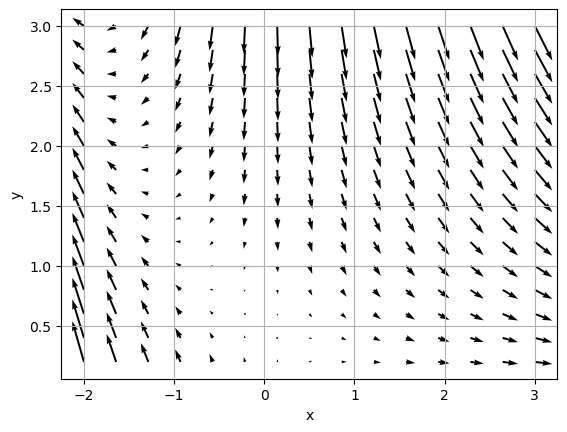

In [111]:
#Gráfica que muestra líneas de vectores como flechas
plt.quiver(x, y, x, np.exp(-x) -2*y)
plt.grid('on')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---

# 11. Un sistema no lineal (depredador-presa)

#### Se encuentran los puntos críticos

In [117]:
x, y = sp.symbols('x y')
pts = sp.solve( [x*(1-x-y), y*(0.75 -0.5*x -y)], {x, y} )
pts[0]

{x: 0.0, y: 0.0}

In [118]:
pts[1]

{x: 0.0, y: 0.750000000000000}

In [119]:
pts[2]

{x: 0.500000000000000, y: 0.500000000000000}

In [120]:
pts[3]

{x: 1.00000000000000, y: 0.0}

#### Se calcula la matriz jacobiana del sistema

In [122]:
X = sp.Matrix([x*(1-x-y), y*(0.75 -0.5*x -y)])
Y = sp.Matrix([x, y])
A = X.jacobian(Y)
A

Matrix([
[-2*x - y + 1,                  -x],
[      -0.5*y, -0.5*x - 2*y + 0.75]])

#### Se evalua la matriz jacobiana en los puntos críticos y se calculan los valores propios para clasificar los puntos críticos

In [123]:
A.subs(pts[0]).eigenvects()

[(1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0]])]),
 (0.750000000000000,
  1,
  [Matrix([
   [  0],
   [1.0]])])]

In [124]:
A.subs(pts[1]).eigenvects()

[(0.250000000000000,
  1,
  [Matrix([
   [ 0.936329177569045],
   [-0.351123441588392]])]),
 (-0.750000000000000,
  1,
  [Matrix([
   [-3.31455461204681e-65],
   [     1.06800046816469]])])]

In [125]:
A.subs(pts[2]).eigenvects()

[(-0.853553390593274,
  1,
  [Matrix([
   [0.816496580927726],
   [0.577350269189626]])]),
 (-0.146446609406726,
  1,
  [Matrix([
   [-0.866025403784439],
   [ 0.612372435695794]])])]

In [126]:
A.subs(pts[3]).eigenvects()

[(-1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0]])]),
 (0.250000000000000,
  1,
  [Matrix([
   [-0.8],
   [ 1.0]])])]

In [127]:
#### Se prepara el gráfico

TypeError: Cannot interpret '0.001' as a data type

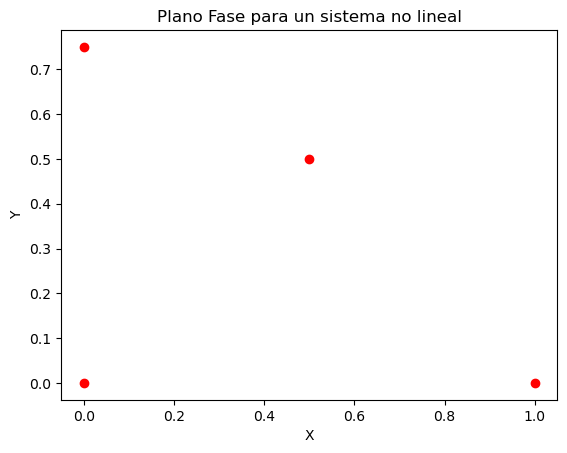

In [128]:
nodos = np.array([ [0, 0, 1, 0.5], [0, 0.75, 0, 0.5] ])
xlabel('X')
ylabel('Y')
title('Plano Fase para un sistema no lineal')
plot(nodos[0], nodos[1], 'ro')
xvalues, yvalues = meshgrid( arange(-0.5, 1, 0.5, 0.001), arange(-0.5, 1, 0.5, 0.001) )
xdot = xvalues*(1 -xvalues -yvalues)
ydot = yvalues*(0.75 -0.5*xvalues -yvalues)
streamplot(xvalues, yvalues, xdot, ydot)
grid()
show()

---

# 12. Problema de valor inicial para una ecuación no lineal (solución numérica)

In [130]:
def model(y, t):
    dydt = sin(y*y)
    return dydt

In [131]:
y0 = 1

In [132]:
#Partición de 0 a 20
t = np.linspace(0, 20)

#### Se resuelve numéricamente

In [134]:
y = odeint(model, y0, t)

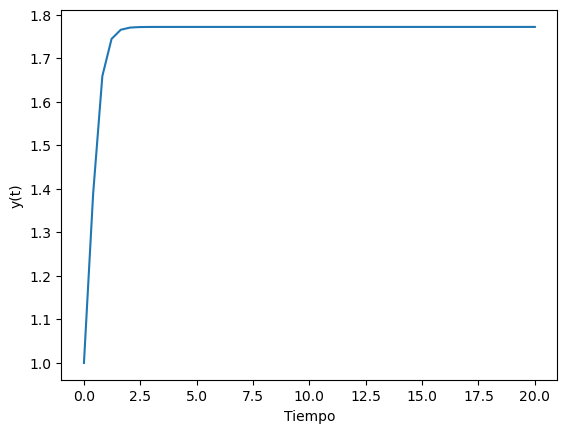

In [135]:
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('y(t)')
plt.show()